## Question One: 

In [1]:
%%bash
plink --vcf /Users/cmdb/qbb2020-answers/week3-hw/BYxRM_segs_saccer3.bam.simplified.vcf --pca --allow-extra-chr --mind

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --mind
  --pca
  --vcf /Users/cmdb/qbb2020-answers/week3-hw/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 8 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28

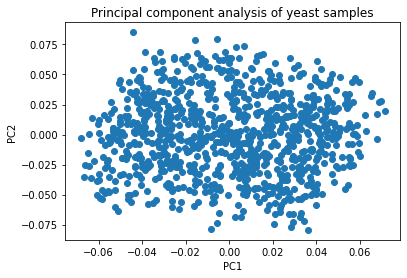

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pca_file = '/Users/cmdb/qbb2020-answers/week3-hw/plink.eigenvec'

namepc = ['IID1', 'IID2']
for i in range(1, 21):
    strpc = 'PC' + str(i)
    namepc.append(strpc)
    


ten_pc = pd.read_csv(pca_file, sep = ' ', names = namepc) 

fig, ax = plt.subplots()
ax.scatter(ten_pc['PC1'], ten_pc['PC2'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Principal component analysis of yeast samples')
plt.show()

## Question Two:

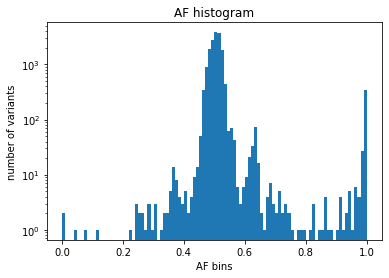

In [3]:
genotype_filename = '/Users/cmdb/qbb2020-answers/week3-hw/BYxRM_segs_saccer3.bam.simplified.vcf'

genotype_file = open(genotype_filename, 'r')

AF = []

for line in genotype_file:                                   # loop through lines in file
    if "#" in line:                                 # skip lines that start with ## or #
        continue
    linesplit = line.strip().split()
    for item in linesplit:
        if 'AF=' in item: 
            item = item.strip('AF=')
            if ',' in item:
                afd = item.split(',')
                [AF.append(float(afi)) for afi in afd]
            else: 
                AF.append(float(item))
    
genotype_file.close()

fig, ax = plt.subplots()
ax.hist(AF, bins = 100)

ax.set_xlabel('AF bins')
ax.set_ylabel('number of variants')
ax.set_title('AF histogram')
ax.set_yscale('log')
plt.show()

## Question three:

In [4]:
%%bash
sed 's/_/ /g' /Users/cmdb/qbb2020-answers/week3-hw/BYxRM_PhenoData.txt > /Users/cmdb/qbb2020-answers/week3-hw/BYxRM_PhenoData_id.txt


In [5]:
%%bash
plink \
  --vcf /Users/cmdb/qbb2020-answers/week3-hw/BYxRM_segs_saccer3.bam.simplified.vcf \
  --pheno /Users/cmdb/qbb2020-answers/week3-hw/BYxRM_PhenoData_id.txt \
  --linear \
  --allow-no-sex \
  --allow-extra-chr \
  --all-pheno  \
  --covar plink.eigenvec \
  --covar-number 1-10

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-extra-chr
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno /Users/cmdb/qbb2020-answers/week3-hw/BYxRM_PhenoData_id.txt
  --vcf /Users/cmdb/qbb2020-answers/week3-hw/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders

## Question Four:

In [6]:
phenotype_file = '/Users/cmdb/qbb2020-answers/week3-hw/BYxRM_PhenoData.txt'
pheno_header = open(phenotype_file, 'r') 
x = True
phenotypes = []
for line in pheno_header: 
    if x == True:
        phenotypes = line.strip('\n').split('\t')
    x = False
print(phenotypes)
pheno_header.close()

['', 'Cadmium_Chloride', 'Caffeine', 'Calcium_Chloride', 'Cisplatin', 'Cobalt_Chloride', 'Congo_red', 'Copper', 'Cycloheximide', 'Diamide', 'E6_Berbamine', 'Ethanol', 'Formamide', 'Galactose', 'Hydrogen_Peroxide', 'Hydroquinone', 'Hydroxyurea', 'Indoleacetic_Acid', 'Lactate', 'Lactose', 'Lithium_Chloride', 'Magnesium_Chloride', 'Magnesium_Sulfate', 'Maltose', 'Mannose', 'Menadione', 'Neomycin', 'Paraquat', 'Raffinose', 'SDS', 'Sorbitol', 'Trehalose', 'Tunicamycin', 'x4-Hydroxybenzaldehyde', 'x4NQO', 'x5-Fluorocytosine', 'x5-Fluorouracil', 'x6-Azauracil', 'Xylose', 'YNB', 'YNB:ph3', 'YNB:ph8', 'YPD', 'YPD:15C', 'YPD:37C', 'YPD:4C', 'Zeocin']


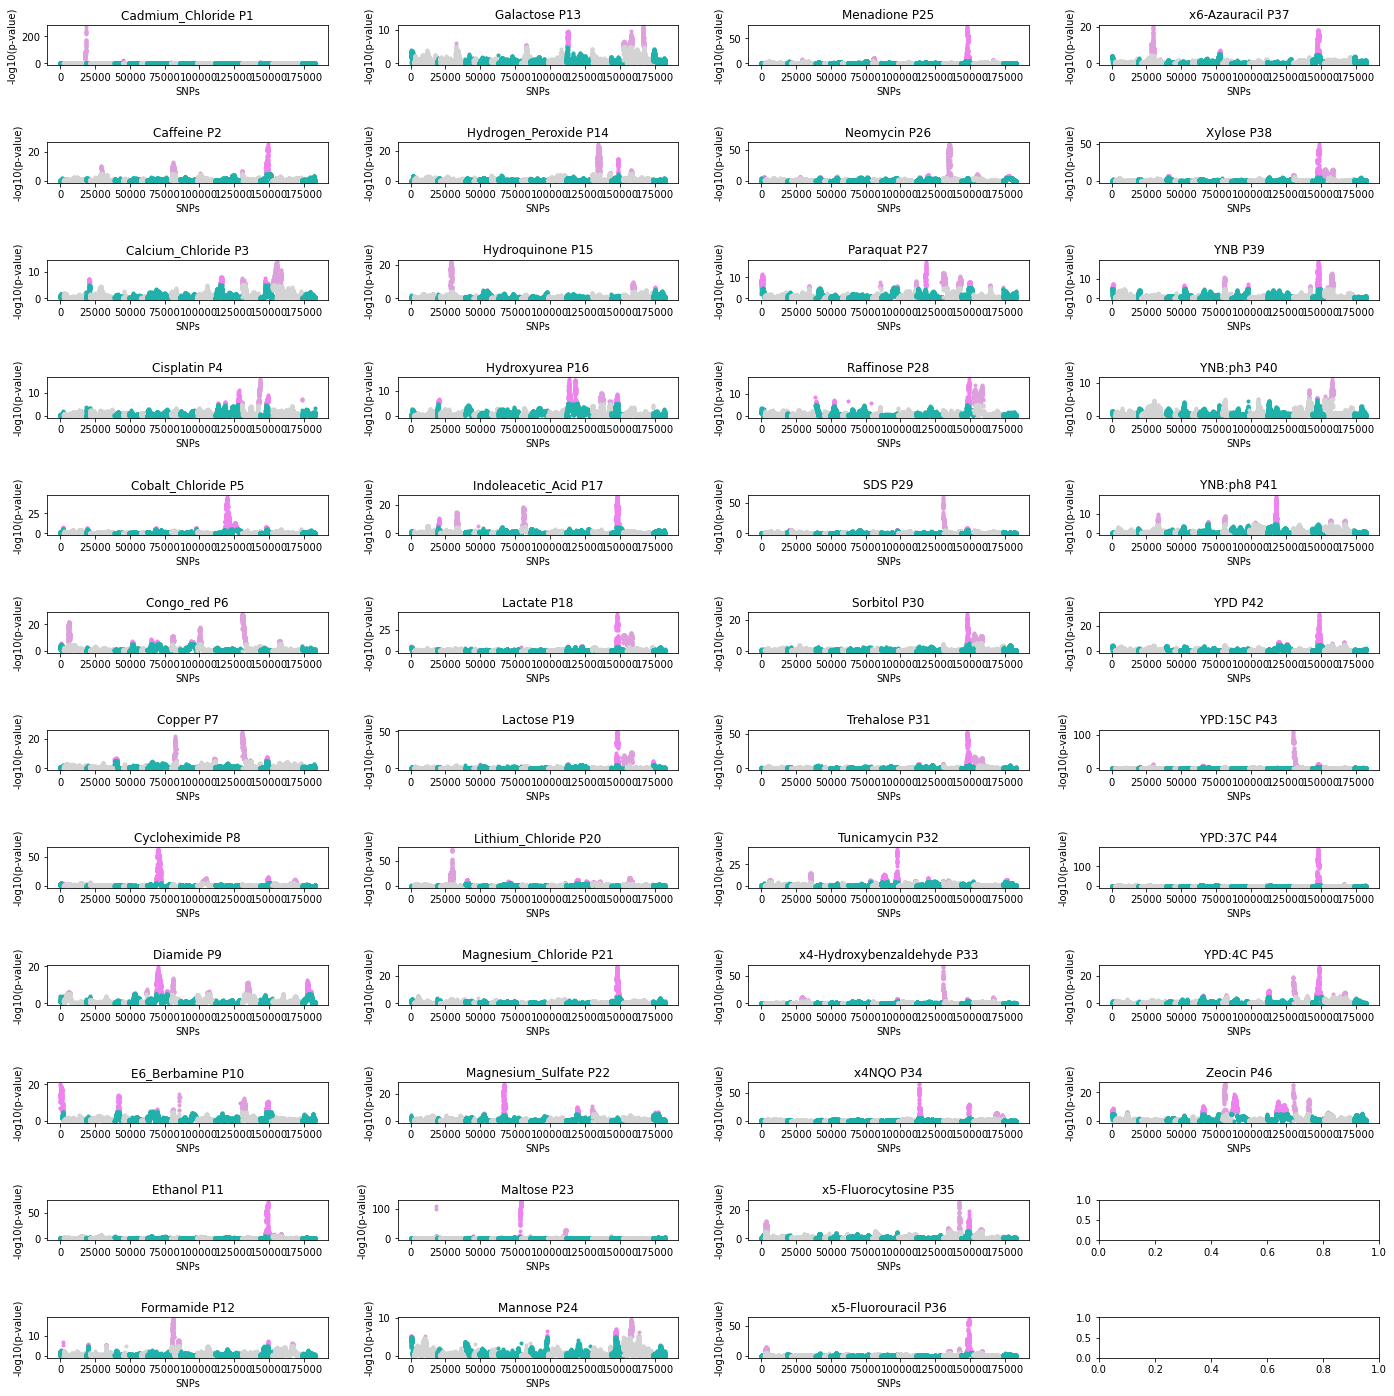

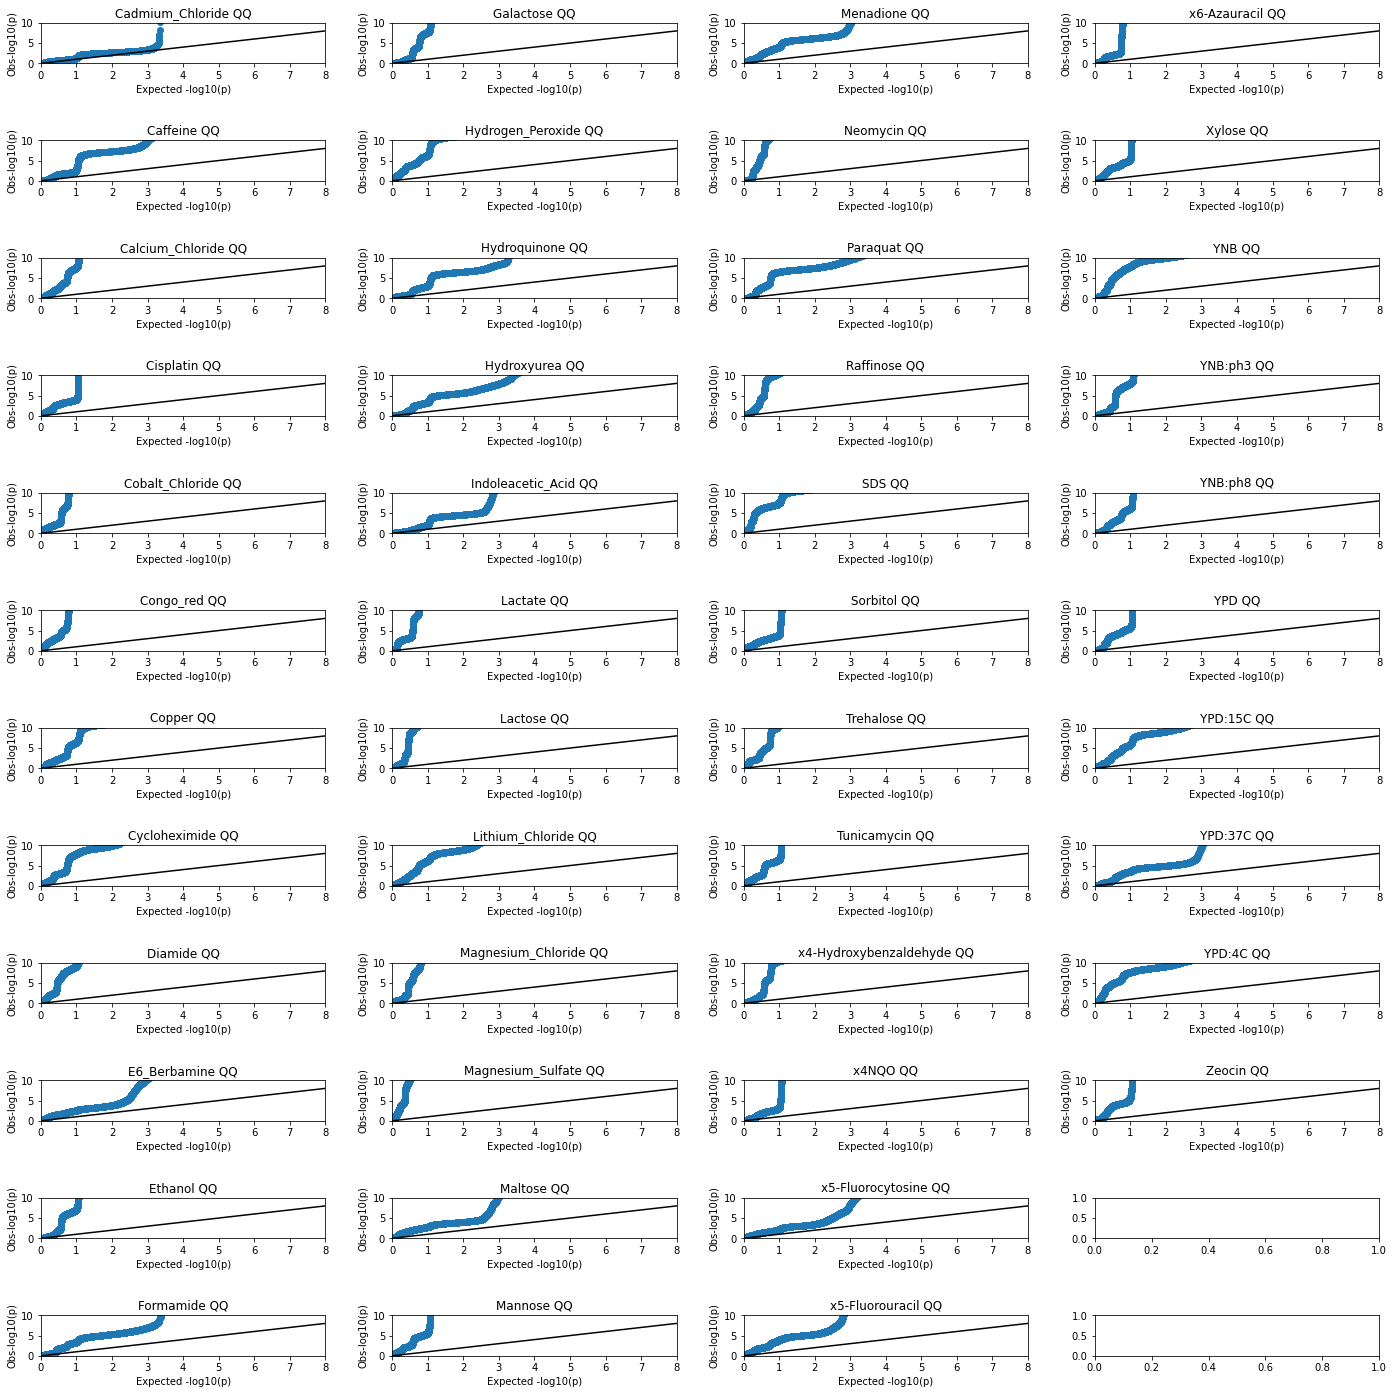

In [7]:
ax1 = 0
fig1 = plt.figure(figsize = (20.0,20.0))
fig2 = plt.figure(figsize =(20,20))
col_count = 0

ax_m = fig1.subplots(12,4)
ax_qq = fig2.subplots(12,4)
for i in range(0,46): 

    qassoc_file = '/Users/cmdb/qbb2020-answers/week3-hw/plink.P' + str(i+1) + '.assoc.linear'
    
    gwas = pd.read_csv(qassoc_file, sep = "\s+")
    gwas['snp_index'] = range(len(gwas))
    gwas['logP'] = -1 * np.log10(gwas['P'])
    
    gwas_sorted = gwas.sort_values(by = "P")
    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
    
    ax2 = int(i/12); alpha = 10**-5; j = 0; color2 = ['lightseagreen', 'lightgrey']; color1 = ['violet', 'plum']
    
    gwas_sig = gwas[gwas['P'] <= alpha]
    gwas_unsig = gwas[gwas['P'] >= alpha]
    
    for chr in gwas["CHR"].unique(): 
        ax_m[ax1,ax2].scatter(gwas_sig["snp_index"][gwas_sig["CHR"] == chr][gwas_sig["TEST"] == "ADD"], gwas_sig["logP"][gwas_sig["CHR"] == chr][gwas_sig["TEST"] == "ADD"], marker = '.', c=color1[j]) 
        ax_m[ax1,ax2].scatter(gwas_unsig["snp_index"][gwas_unsig["CHR"] == chr][gwas_unsig["TEST"] == "ADD"], gwas_unsig["logP"][gwas_unsig["CHR"] == chr][gwas_unsig["TEST"] == "ADD"], marker = '.', c=color2[j])
        j += 1; 
        if j == 2: j = 0
                    
    ax_m[ax1,ax2].set_xlabel("SNPs")
    ax_m[ax1,ax2].set_ylabel("-log10(p-value)")
    ax_m[ax1, ax2].set_title(phenotypes[i+1] + ' P' + str(i+1))
    
    ax_qq[ax1,ax2].scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    ax_qq[ax1,ax2].plot([8,0], [8, 0], color = "black")

    ax_qq[ax1,ax2].set_xlim([0, 8])
    ax_qq[ax1,ax2].set_ylim([0, 10])
    ax_qq[ax1, ax2].set_title(phenotypes[i+1] +' QQ')
    ax_qq[ax1,ax2].set_xlabel("Expected -log10(p)")
    ax_qq[ax1,ax2].set_ylabel("Obs-log10(p)")
    
    ax1 += 1; 
    if ax1 == 12: ax1 = 0
        
    del gwas
    del qassoc_file
    del gwas_sorted
    
fig1.tight_layout(pad=3.0)
fig2.tight_layout(pad=3.0)

## Question Five:

Text(0, 0.5, 'Caffeine Phenotype')

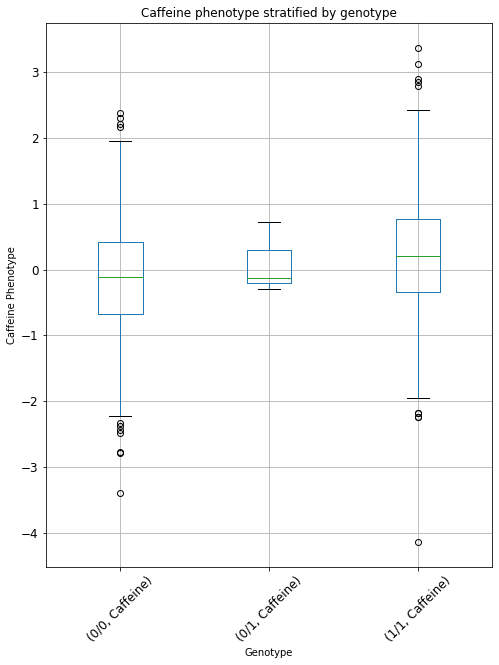

In [10]:
# trait choice = caffeine
qassoc_file = '/Users/cmdb/qbb2020-answers/week3-hw/plink.P6.assoc.linear'
gwas = pd.read_csv(qassoc_file, sep = "\s+")
gwas_sorted = gwas.sort_values(by = "P")

genotype_filename = '/Users/cmdb/qbb2020-answers/week3-hw/BYxRM_segs_saccer3.bam.simplified.vcf'
genotype_file = open(genotype_filename, 'r')

phenotype_file = '/Users/cmdb/qbb2020-answers/week3-hw/BYxRM_PhenoData.txt'
phenotype = pd.read_csv(phenotype_file, '\t')

BP = gwas_sorted.iloc[0]['BP']
chrm = str(gwas_sorted.iloc[0]['CHR'])
geno_Pos = {}

for line in genotype_file:                                   # loop through lines in file
    if "##" in line:                                 # skip lines that start with ## or #
        continue
    if "#" in line: 
        head = line.strip('#')
        header = head.strip('\n').split('\t')
        continue
    linesplit = line.strip('\n').split('\t')
    if chrm not in line: 
        continue
    Pos = int(linesplit[1])
    if Pos == BP:
        for index,item in enumerate(linesplit):
            item = item.split(':')
            key = header[index]
            geno_Pos[key] = item[0]
genotype_file.close()

geno = pd.DataFrame.from_dict(geno_Pos, orient='index', columns = ['Genotype'])
geno = geno.reset_index()
geno.columns.values[0] = "ID"
phenotype.columns.values[0] = "ID"
pheno_caff = phenotype[["ID", "Caffeine"]]
geno_pheno_caff = geno.merge(pheno_caff, on = ["ID"])
geno_pheno_caff["Genotype"].unique()

gp_caff = geno_pheno_caff[geno_pheno_caff["Genotype"] != './.']
groups = gp_caff.groupby("Genotype")
groups.boxplot(subplots=False, rot=45, fontsize=12, figsize=(8,10))
plt.title('Caffeine phenotype stratified by genotype')
plt.xlabel('Genotype')
plt.ylabel('Caffeine Phenotype')